<a href="https://colab.research.google.com/github/Chamara-g/fyp_short_sem/blob/master/dataNormalizeAndVisualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Remove unnecessory data form geneDataBeforePreprocessGSE5281.txt file**


In [0]:
import pandas as pd

dataset_path = 'drive/My Drive/FYP/dataset/'
file_name = 'gse5281.csv'

matrix = pd.read_csv(dataset_path + file_name , index_col = 0) #not use the first column as the index

df = pd.DataFrame(matrix)

df['class'] = df['class'].replace({'disease state: normal': 'Disease State: normal','disease state: Alzheimer\'s Disease': "Disease State: Alzheimer\'s Disease"})

**First map the string values of class to integer**

In [0]:
def mappingStringToNum(data,feature):
    featureMap = dict() #creates a dictionary
    count = 0
    for i in sorted( data[feature].unique() , reverse=True): #Descending order
        featureMap[i] = count
        count = count + 1
    data[feature] = data[feature].map(featureMap)
    return data
  
df_class_Numeric = mappingStringToNum(df,"class") 
df_class_Numeric.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
GSM119615,693.97330,9.755318,13.346846,173.09245,52.616950,67.753624,209.41220,10.765010,10.559881,38.878853,5.484453,116.53313,73.79013,225.46147,297.57170,42.922966,19.755875,7.579159,51.649340,56.689617,2.655222,14.917539,54.411297,201.60397,158.08125,10.250906,85.11056,48.826140,87.42289,12.392481,19.993877,1457.6807,126.137260,375.435420,13.464786,53.246395,235.429800,4.360894,93.84707,40.427883,...,2353.5408,1881.7977,1111.2980,1441.330400,52.214560,458.626980,16.581766,834.03253,885.4766,799.140200,80.598760,308.765660,6194.911600,108.541794,2028.572800,828.969200,49.812200,465.345430,1118.705400,127.210760,346.272900,2271.309600,93.839540,419.656070,375.28570,550.11570,403.32828,1030.64800,999.02826,4114.2500,4114.5767,13951.371,9590.616,1821.608200,46.302326,279.892550,9.149380,5.280712,7.380331,0
GSM119616,807.14514,19.052270,18.217276,289.31540,110.375984,96.780740,470.43307,3.834024,27.871660,73.023575,19.886892,252.85771,79.24272,473.12085,370.22928,30.042309,3.287976,50.133670,65.331116,36.677937,3.063504,7.018197,89.180200,349.41614,204.65222,29.194675,165.02486,65.580185,137.38873,5.797967,24.702430,2099.9524,124.523780,161.198820,1.497704,62.944225,352.173500,24.465563,203.51826,2.894964,...,2271.1428,1591.4951,2258.4102,27.043436,16.600973,5.524237,12.614238,1057.02930,1071.4303,14.699751,7.664094,2.282215,0.617290,4.258958,1.365906,17.621204,2.127623,1.209513,8.375128,0.854726,27.108965,7.673651,23.027678,1.532272,307.77267,239.63582,236.87778,965.04987,836.00030,5400.4585,4465.0913,19854.145,14496.598,21.710300,5.705804,3.477558,1.878478,3.469311,3.117868,0
GSM119617,1722.62500,13.060389,97.425470,537.18280,99.021736,76.282050,908.26636,7.970618,121.391370,17.437328,27.643036,444.59845,164.86464,529.13245,454.59918,70.641660,71.643800,73.103640,117.597790,34.379310,10.420430,51.647556,208.393660,659.61725,324.83520,114.587550,269.46832,207.674360,159.26926,93.024240,236.547160,1699.6472,95.040160,68.975110,61.175830,146.770800,46.345924,21.683992,197.38115,8.807348,...,5666.8580,3495.7336,4595.0386,54.447624,29.744411,30.335146,38.709427,3878.94300,3833.8530,70.623030,25.939754,3.082529,69.205880,5.781343,57.731537,48.762936,12.538875,38.581352,75.063850,71.461910,8.914477,45.994278,81.607770,18.921083,566.19100,558.53436,359.53750,1878.99730,1702.25010,11152.8860,8695.5380,47580.984,33593.055,36.736942,30.422820,6.315493,8.501900,23.347307,67.153730,0
GSM119618,1668.05750,14.652245,98.197945,496.34656,17.306772,189.819600,1029.78850,3.469380,48.153168,10.587775,68.110080,291.67242,149.77821,425.39767,374.79654,100.327500,54.237900,111.523926,72.039580,97.554280,6.711966,42.625465,250.295460,447.05258,281.17136,32.327640,224.95204,38.072820,203.50043,24.288298,34.720062,2127.1682,82.957565,94.341995,11.089184,48.190640,101.552430,34.932297,173.016

**Normalize and Scaling**

In [0]:
def normalize(dataset):
    dataNorm = ((dataset-dataset.min())/(dataset.max()-dataset.min()))*1
    dataNorm["class"]=dataset["class"]
    return dataNorm
  
df_Normalized = normalize(df_class_Numeric)
df_Normalized.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
GSM119615,0.192066,0.035711,0.061625,0.170116,0.078732,0.170804,0.070598,0.070331,0.059378,0.149794,0.048762,0.165953,0.292191,0.212183,0.139367,0.200351,0.084936,0.039528,0.141414,0.221325,0.006121,0.066994,0.154343,0.218468,0.192167,0.050202,0.158940,0.149958,0.264006,0.103812,0.052749,0.194243,0.199124,0.453908,0.131477,0.264622,0.111986,0.012342,0.190684,0.258957,...,0.090851,0.064839,0.034150,0.027478,0.021226,0.033049,0.046026,0.035800,0.106596,0.018223,0.014616,0.015142,0.067261,0.009800,0.029911,0.036936,0.016418,0.029160,0.023175,0.015080,0.015908,0.031338,0.022868,0.018715,0.016263,0.026592,0.012532,0.003286,0.005753,0.003083,0.004239,0.004786,0.002532,0.028735,0.017846,0.016189,0.040901,0.029207,0.062306,0
GSM119616,0.227039,0.079360,0.090087,0.302222,0.171081,0.260997,0.195920,0.019980,0.161671,0.286513,0.244908,0.399101,0.315745,0.453290,0.188811,0.137887,0.006215,0.280962,0.179898,0.139246,0.007657,0.025022,0.256233,0.380263,0.250707,0.172143,0.313611,0.206478,0.431882,0.044231,0.067339,0.281150,0.196325,0.192739,0.007099,0.314979,0.176240,0.107824,0.430220,0.007463,...,0.086554,0.052936,0.097322,0.000479,0.006236,0.000248,0.033619,0.057374,0.149991,0.000183,0.001236,0.000043,0.000000,0.000292,0.000011,0.000763,0.000470,0.000035,0.000117,0.000037,0.001178,0.000086,0.005222,0.000020,0.007974,0.000990,0.000000,0.001544,0.001635,0.010498,0.006378,0.016213,0.015200,0.000311,0.001744,0.000117,0.005659,0.016431,0.023065,0
GSM119617,0.509945,0.051228,0.552980,0.583963,0.152927,0.197303,0.406134,0.050031,0.714266,0.063939,0.350538,0.727023,0.685616,0.507819,0.246226,0.334772,0.332975,0.411283,0.326911,0.129819,0.035339,0.262155,0.605587,0.719809,0.401776,0.721816,0.515757,0.685834,0.505396,0.832320,0.723734,0.226984,0.145171,0.080312,0.627356,0.750255,0.007917,0.094614,0.416816,0.047080,...,0.263616,0.131011,0.226002,0.001002,0.011768,0.002044,0.115225,0.330380,0.794644,0.001469,0.004588,0.000082,0.000745,0.000431,0.000843,0.002152,0.003952,0.002380,0.001502,0.008443,0.000338,0.000615,0.019820,0.000798,0.039702,0.027286,0.009235,0.025822,0.023518,0.043663,0.032197,0.069888,0.064511,0.000549,0.011548,0.000282,0.037763,0.156628,0.612593,0
GSM119618,0.493082,0.058702,0.557494,0.537546,0.022275,0.550088,0.464479,0.017331,0.281511,0.036513,0.901656,0.465483,0.620445,0.406829,0.191919,0.478732,0.249770,0.629261,0.198767,0.388932,0.021385,0.214217,0.728380,0.487136,0.346891,0.192309,0.429598,0.113681,0.654005,0.211291,0.098378,0.284833,0.124208,0.111236,0.106787,0.238370,0.038302,0.157533,0.363600,0.003947,...,0.241698,0.126296,0.211368,0.001125,0.008192,0.000572,0.047690,0.299063,0.725382,0.001442,0.000475,0.000401,0.000048,0.000322,0.000025,0.000106,0.006361,0.001389,0.001026,0.004997,0.000192,0.000140,0.000239,0.004804,0.079268,0.034657,0.017872,0.029059,0.032560,0

**class len**

In [0]:
len(list(df['class'].unique()))

2

**Mean Plot**

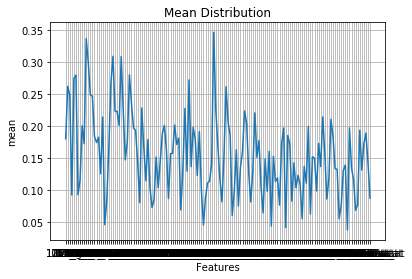

In [0]:
import matplotlib.pyplot as plt

df1 = df_Normalized[list(df_Normalized.columns[1:150].values)]
plt.plot(  df1.columns, df1.mean(axis = 0), label='linear')

plt.xlabel('Features')
plt.ylabel('mean')
plt.title('Mean Distribution')
plt.grid(True)
plt.show()

**Box-plot**

Text(0.5, 1.0, 'Box Plot')

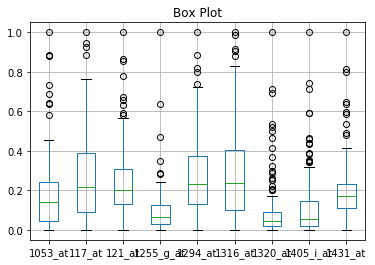

In [0]:
boxplot = df_Normalized.boxplot(column=list(df_Normalized.columns[1:10].values))

boxplot.set_title('Box Plot')

**Histogram**

Text(0.5, 1.0, 'Histogram | 221561_at')

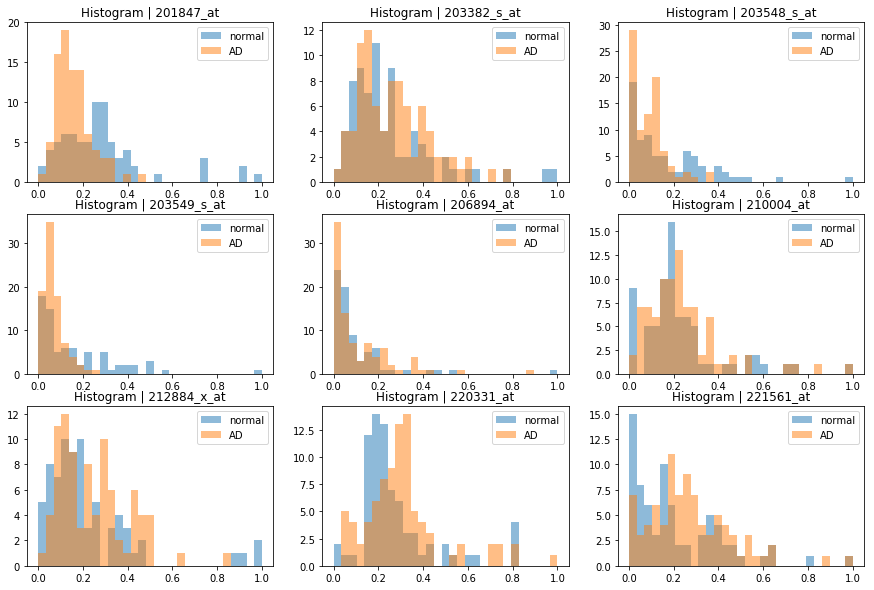

In [0]:
import numpy

NonDisease = df_Normalized.loc[df_Normalized['class'] == 0]
Disease = df_Normalized.loc[df_Normalized['class'] == 1]

#x = NonDisease['212884_x_at']
#y = Disease['212884_x_at']

bins = numpy.linspace(0, 1, 30)

plt.figure(figsize=(15,10))

plt.subplot(331)
plt.hist(NonDisease['201847_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['201847_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 201847_at')

plt.subplot(332)
plt.hist(NonDisease['203382_s_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['203382_s_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 203382_s_at')

plt.subplot(333)
plt.hist(NonDisease['203548_s_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['203548_s_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 203548_s_at')

plt.subplot(334)
plt.hist(NonDisease['203549_s_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['203549_s_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 203549_s_at')

plt.subplot(335)
plt.hist(NonDisease['206894_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['206894_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 206894_at')

plt.subplot(336)
plt.hist(NonDisease['210004_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['210004_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 210004_at')

plt.subplot(337)
plt.hist(NonDisease['212884_x_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['212884_x_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 212884_x_at')

plt.subplot(338)
plt.hist(NonDisease['220331_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['220331_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 220331_at')

plt.subplot(339)
plt.hist(NonDisease['221561_at'], bins, alpha=0.5, label='normal')
plt.hist(Disease['221561_at'], bins, alpha=0.5, label='AD')
plt.legend(loc='upper right')
plt.title('Histogram | 221561_at')

**save plk file**

In [0]:
df_Normalized.to_pickle('drive/My Drive/Colab Notebooks/plk/gse5281Normalized.plk')